In [128]:
# Разведовательный анализ данных (eda)
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/titanic.csv"

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns

In [130]:
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
df.iloc[:, :3]

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3
...,...,...,...
886,887,0,2
887,888,1,1
888,889,0,3
889,890,1,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [133]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


DataFrame.drop(_labels=None_, _*_, _axis=0_, _index=None_, _columns=None_, _level=None_, _inplace=False_, _errors='raise'_)

Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding axis, or by directly specifying index or column names. When using a multi-index, labels on different levels can be removed by specifying the level. See the [user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-shown-levels) for more information about the now unused levels.

Parameters:

**labels**single label or list-like

Index or column labels to drop. A tuple will be used as a single label and not treated as a list-like.

**axis**{0 or ‘index’, 1 or ‘columns’}, default 0

Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

**index**single label or list-like

Alternative to specifying axis (`labels, axis=0` is equivalent to `index=labels`).

**columns**single label or list-like

Alternative to specifying axis (`labels, axis=1` is equivalent to `columns=labels`).

**level**int or level name, optional

For MultiIndex, level from which the labels will be removed.

**inplace**bool, default False

If False, return a copy. Otherwise, do operation in place and return None.

**errors**{‘ignore’, ‘raise’}, default ‘raise’

If ‘ignore’, suppress error and only existing labels are dropped.

In [134]:
df1 = df.copy()
df = df.drop(['PassengerId','Ticket', 'Name', 'Sex', 'Cabin', 'Embarked'],axis=1)

In [135]:
df.shape

(891, 6)

In [136]:
df.size

5346

In [137]:
df['Fare']  = round(df['Fare'])
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.0
1,1,1,38.0,1,0,71.0
2,1,3,26.0,0,0,8.0
3,1,1,35.0,1,0,53.0
4,0,3,35.0,0,0,8.0
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0
887,1,1,19.0,0,0,30.0
888,0,3,NaN,1,2,23.0
889,1,1,26.0,0,0,30.0



`DataFrame.isna()`
Detect missing values.

Return a boolean same-sized object indicating if the values are NA. NA values, such as None or `numpy.NaN`, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings `''` or `numpy.inf` are not considered NA values (unless you set `pandas.options.mode.use_inf_as_na = True`).


In [138]:
# Counting passes
df.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [139]:
# df['Age'].fillna(25)
# Creating a middle age
mean_age = df['Age'].mean()

<Axes: >

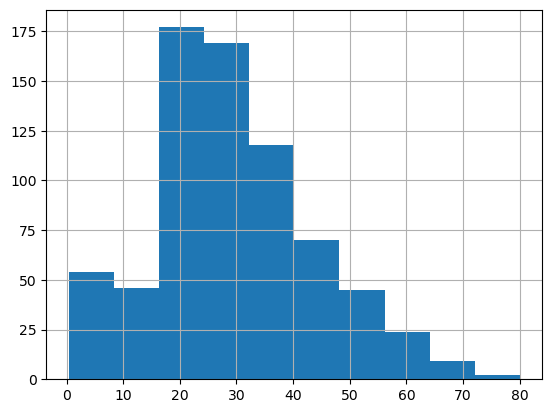

In [140]:
df['Age'].hist()

In [141]:

df['Age'].fillna(mean_age)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [142]:
df.query('Pclass == 1').Age.mean()

38.233440860215055

In [143]:
df.sample(15)

,Survived,Pclass,Age,SibSp,Parch,Fare
17,1,2,NaN,0,0,13.0
141,1,3,22.0,0,0,8.0
256,1,1,NaN,0,0,79.0
551,0,2,27.0,0,0,26.0
832,0,3,NaN,0,0,7.0
668,0,3,43.0,0,0,8.0
658,0,2,23.0,0,0,13.0
517,0,3,NaN,0,0,24.0
475,0,1,NaN,0,0,52.0
863,0,3,NaN,8,2,70.0


In [144]:
def fill_age(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return df.query('Pclass == 1').Age.mean()
        elif row['Pclass'] == 2:
            return df.query('Pclass == 2').Age.mean()
        elif row['Pclass'] == 3:
            return df.query('Pclass == 3').Age.mean()
    return row['Age']     

In [145]:
df.apply(fill_age, axis='columns')

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Length: 891, dtype: float64

In [146]:
# Группировка по Pclass, разбивает на группы по значениям Pclass, из каждой группы выбираем Age, заполняем пропуски ср.зн, через аноноим.ф. 
# group_keys=True Возвращает объект GroupedDataFrame, где индекс содержит столбец Pclass(будут ли ключи гркппировки включены в инд результ объекта)
df.groupby('Pclass', group_keys=True)['Age'].apply(lambda x: x.fillna(x.mean()))

Pclass     
1       1      38.00000
        3      35.00000
        6      54.00000
        11     58.00000
        23     28.00000
                 ...   
3       882    22.00000
        884    25.00000
        885    39.00000
        888    25.14062
        890    32.00000
Name: Age, Length: 891, dtype: float64

In [147]:
# Проверяет эквавалентонсть способов 
df.apply(fill_age, axis=1).equals(df.groupby('Pclass', group_keys=True)['Age'].apply(lambda x: x.fillna(x.mean())))

False

In [148]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.0
1,1,1,38.0,1,0,71.0
2,1,3,26.0,0,0,8.0
3,1,1,35.0,1,0,53.0
4,0,3,35.0,0,0,8.0


In [149]:
# SibSp - Количество братьев и сестер / супругов на борту
# Parch - число родителей / детей на борту

def alone_check(row):
    if row['SibSp'] > 0 or row['Parch'] > 0:
        return 'not alone'
    return 'alone'

In [150]:
df['Alone'] = df.apply(alone_check, axis=1)
df



,Survived,Pclass,Age,SibSp,Parch,Fare,Alone
0,0,3,22.0,1,0,7.0,not alone
1,1,1,38.0,1,0,71.0,not alone
2,1,3,26.0,0,0,8.0,alone
3,1,1,35.0,1,0,53.0,not alone
4,0,3,35.0,0,0,8.0,alone
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0,alone
887,1,1,19.0,0,0,30.0,alone
888,0,3,NaN,1,2,23.0,not alone
889,1,1,26.0,0,0,30.0,alone


In [151]:
df['Alone'] = df.apply(lambda x: 'not alone' if x['SibSp'] > 0 or x['Parch'] > 0 else 'alone', axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Alone
0,0,3,22.0,1,0,7.0,not alone
1,1,1,38.0,1,0,71.0,not alone
2,1,3,26.0,0,0,8.0,alone
3,1,1,35.0,1,0,53.0,not alone
4,0,3,35.0,0,0,8.0,alone
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0,alone
887,1,1,19.0,0,0,30.0,alone
888,0,3,NaN,1,2,23.0,not alone
889,1,1,26.0,0,0,30.0,alone


In [152]:
import seaborn as sns

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


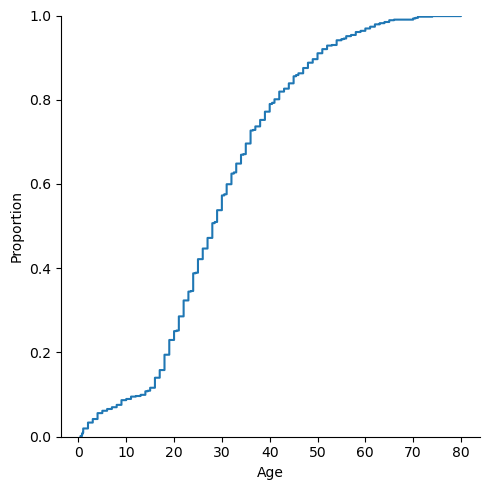

In [153]:
sns.displot(df['Age'], kind='ecdf')

In [154]:
df.iloc[:, :-1]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.0
1,1,1,38.0,1,0,71.0
2,1,3,26.0,0,0,8.0
3,1,1,35.0,1,0,53.0
4,0,3,35.0,0,0,8.0
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0
887,1,1,19.0,0,0,30.0
888,0,3,NaN,1,2,23.0
889,1,1,26.0,0,0,30.0


<Axes: >

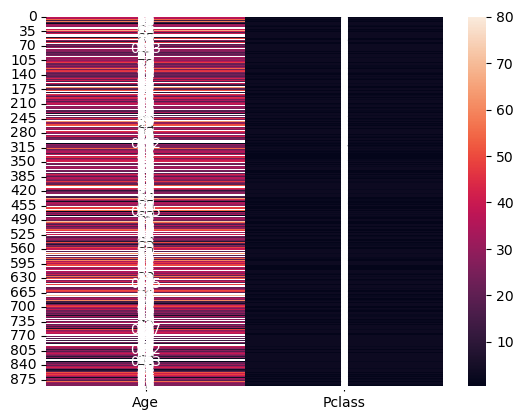

In [155]:
sns.heatmap(data=df[['Age', 'Pclass']], annot=True)

In [156]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.214366
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693352
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,8.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


In [157]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [158]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [159]:
df['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

In [160]:
df_class1 = df[df['Pclass'] == 1]


In [161]:
df1[(df1['Pclass'] == 3) & (df1['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


Описательные статистики, разведка данных 

In [162]:
df1['Fare'].mean()

32.204207968574636

In [163]:
df1['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

In [164]:
df1['Fare'].quantile([0.25, 0.5, 0.25])

0.25     7.9104
0.50    14.4542
0.25     7.9104
Name: Fare, dtype: float64

вместо std далее будем использовать mad

In [165]:
df1['Fare'].agg(['mean', 'median', 'std'])

mean      32.204208
median    14.454200
std       49.693429
Name: Fare, dtype: float64

Axes(0.125,0.11;0.775x0.77)


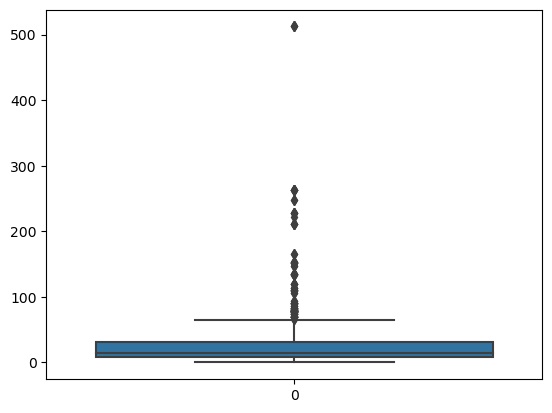

In [166]:
print(sns.boxplot(data=df1['Fare']))


In [169]:
import statsmodels.api as sm

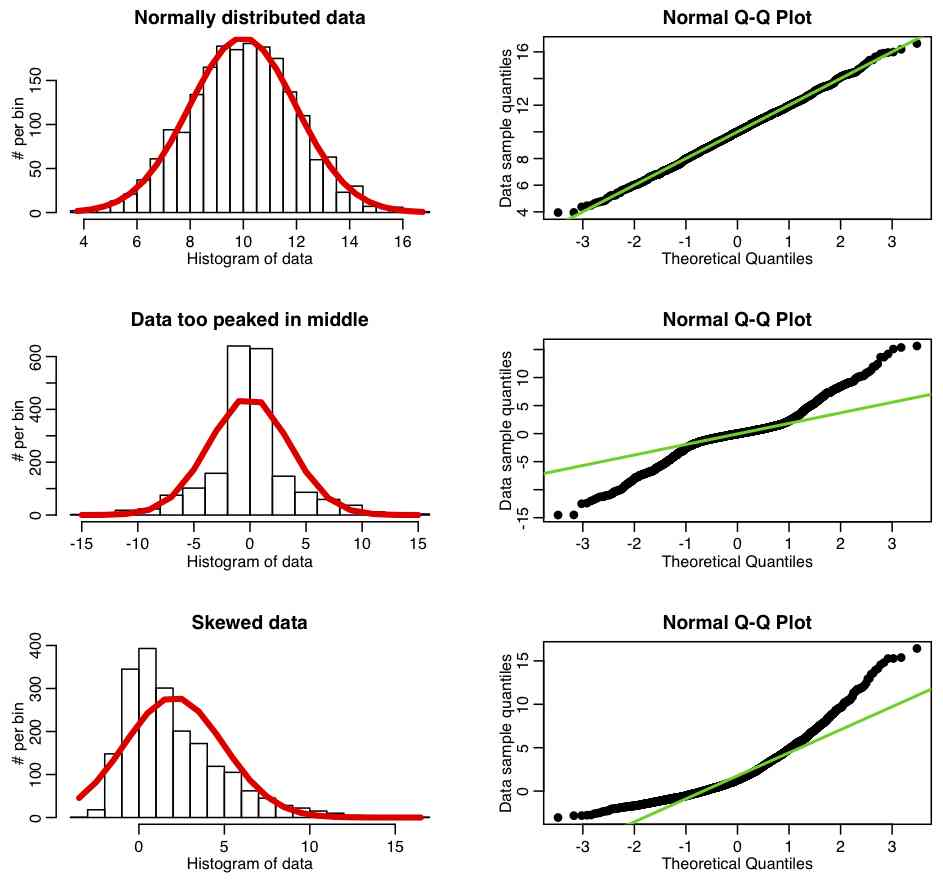(with=200)


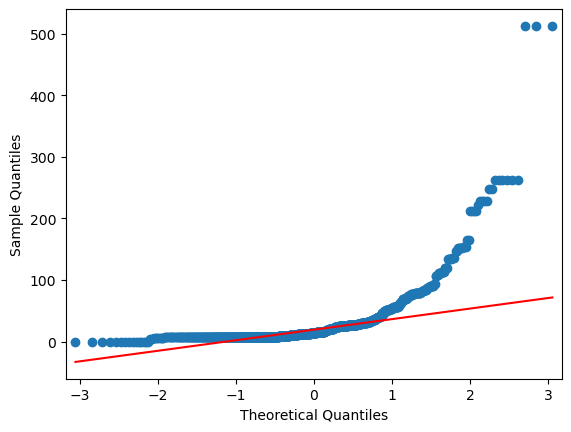

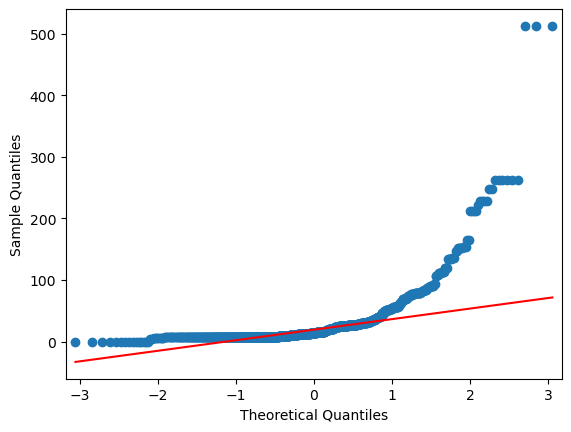

In [193]:
from scipy.stats import norm
sm.qqplot(data=df1['Fare'], line='q')
# ДЗ 
# uniform, qqplot-как распределния, тест Шапиро-уилка., Pvalue, наложить два графика

qqplot - дял сравнения распределний, показывает насколько наши данные из одного распр совпдает  с др. распр 

<Axes: ylabel='Fare'>

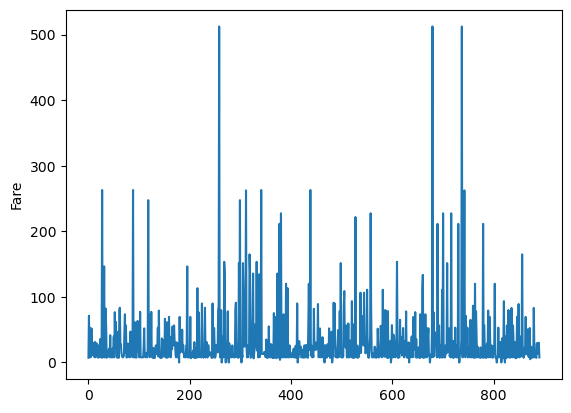

In [177]:
#sns.histplot(data=df1['Fare'])
sns.lineplot(data=df1['Fare'])